<a href="https://colab.research.google.com/github/AnudeepDasAD/Fashion-Detection/blob/master/mnistfashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U tensorflow_datasets


     |████████████████████████████████| 2.3MB 2.8MB/s 


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.
Number of training examples: 60000
Number of test examples: 10000


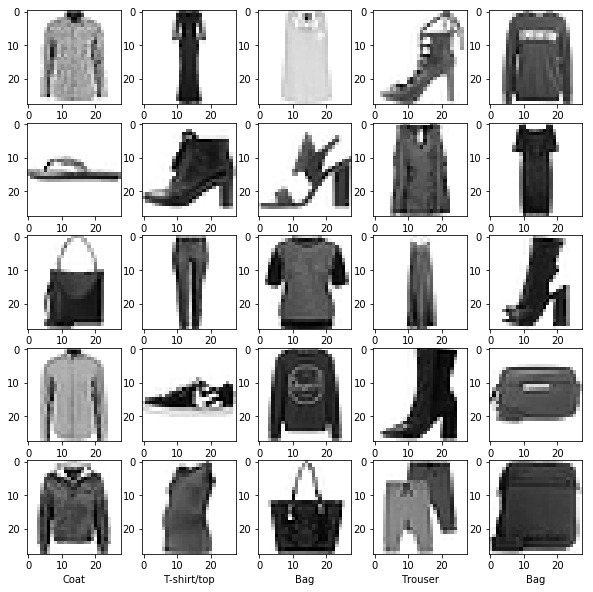

Epoch 1/5
313/313 [==============================] - 15s 49ms/step - loss: 0.7038
Epoch 2/5
313/313 [==============================] - 3s 11ms/step - loss: 0.5267
Epoch 3/5
313/313 [==============================] - 3s 11ms/step - loss: 0.4653
Epoch 4/5
313/313 [==============================] - 3s 11ms/step - loss: 0.4375
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 0.4317


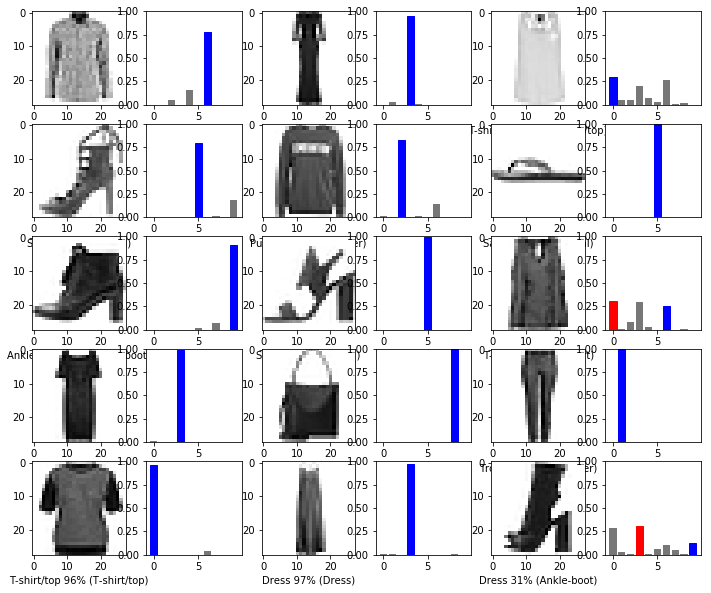

In [0]:
#@title
from __future__ import absolute_import, division, print_function

#Importing tensorflow and data sets
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

#Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)





#Load all of the data sets
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

train_dataset, test_dataset = dataset['train'], dataset['test']


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']





#Checking the data

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))


#normalizing the data (instead of having pixels from 0 to 255, going to put all of the values between 0 and 1)
def normalize(images, labels):
  #turns the images into array of float values?
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#maps the normalize function
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)



#----------------------------------------------------------------------------------------------

#Display the 25 images from the training dataset, with the correct class name under it
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()
#-----------------------------------------------------------------------------------------------


#MAKING THE LAYERS

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),  #input layer (flattening to 1D)
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  #hidden layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  #output layer
])

#COMPILING THE MODEL
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy')

#BEGIN THE TRAINING
BATCH_SIZE = 32
#repeat() flag shows that the dataset should iterate forever
#training termination will determined by the epochs parameter and the fit method
#shuffle() randomizes the order of all the training examples
#batch(32) groups 32 examples during the training (speeds up the training process)
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_test_examples/BATCH_SIZE))




#MAKE PREDICTIONS

#on full batch (32 examples)
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape
predictions[0]

#which clothing item was predicted
np.argmax(predictions[0])
test_labels[0]

#correct guess!


#------------------------------------------------------------------------
#FANCY PLOTS

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)
  
  #gets the predicted label
  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    colour = 'blue'
  else:
    colour = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=colour))
  
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  this_plot = plt.bar(range(10), predictions_array, color="#777777")
  
  plt.ylim([0,1])
   
  predicted_label = np.argmax(predictions_array)
  this_plot[predicted_label].set_color('red')
  this_plot[true_label].set_color('blue')
    
    
    

#Plot the first X test images, their predicted label, and their true label
# Red is incorrect and blue is correct

num_rows = 5
num_cols = 3

num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range (num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
  
  

